In [1]:
import os
for dirname, _, filenames in os.walk('C:/Users/harsh/OneDrive/Documents/cifar10'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import pandas as pd 

C:/Users/harsh/OneDrive/Documents/cifar10\cifar-10-python.tar.gz
C:/Users/harsh/OneDrive/Documents/cifar10\cifar-10-batches-py\batches.meta
C:/Users/harsh/OneDrive/Documents/cifar10\cifar-10-batches-py\data_batch_1
C:/Users/harsh/OneDrive/Documents/cifar10\cifar-10-batches-py\data_batch_2
C:/Users/harsh/OneDrive/Documents/cifar10\cifar-10-batches-py\data_batch_3
C:/Users/harsh/OneDrive/Documents/cifar10\cifar-10-batches-py\data_batch_4
C:/Users/harsh/OneDrive/Documents/cifar10\cifar-10-batches-py\data_batch_5
C:/Users/harsh/OneDrive/Documents/cifar10\cifar-10-batches-py\readme.html
C:/Users/harsh/OneDrive/Documents/cifar10\cifar-10-batches-py\test_batch
C:/Users/harsh/OneDrive/Documents/cifar10\test\airplane\0001.png
C:/Users/harsh/OneDrive/Documents/cifar10\test\airplane\0002.png
C:/Users/harsh/OneDrive/Documents/cifar10\test\airplane\0003.png
C:/Users/harsh/OneDrive/Documents/cifar10\test\airplane\0004.png
C:/Users/harsh/OneDrive/Documents/cifar10\test\airplane\0005.png
C:/Users/hars

In [2]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data() 

In [3]:
# Checking loaded data 
print('Total number of Images in the Dataset:', len(x_train) + len(x_test))
print('Number of train images:', len(x_train))
print('Number of test images:', len(x_test))
print('Shape of training dataset:',x_train.shape)
print('Shape of testing dataset:',x_test.shape)

Total number of Images in the Dataset: 60000
Number of train images: 50000
Number of test images: 10000
Shape of training dataset: (50000, 32, 32, 3)
Shape of testing dataset: (10000, 32, 32, 3)


In [4]:
def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)
    
    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)
        
    return

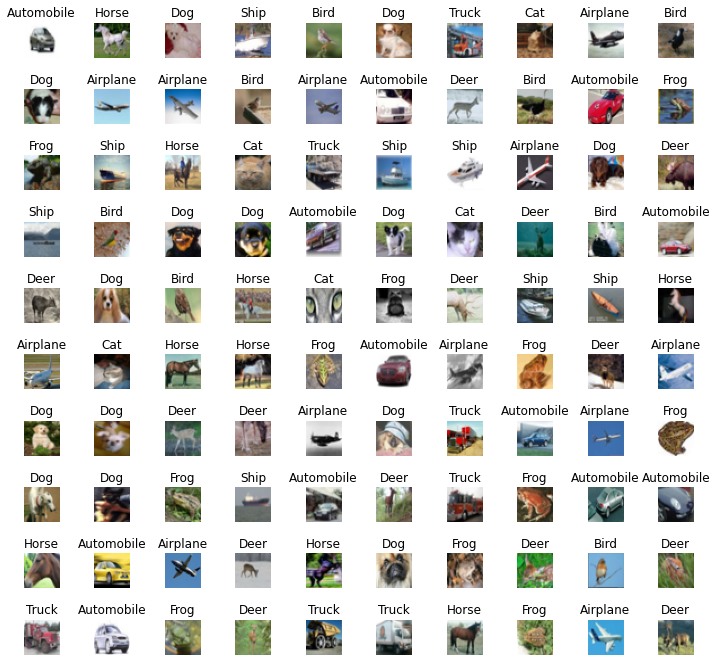

In [5]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
num_row = 10
num_col = 10
showImages(num_row,num_col,X =x_train,Y = y_train)

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


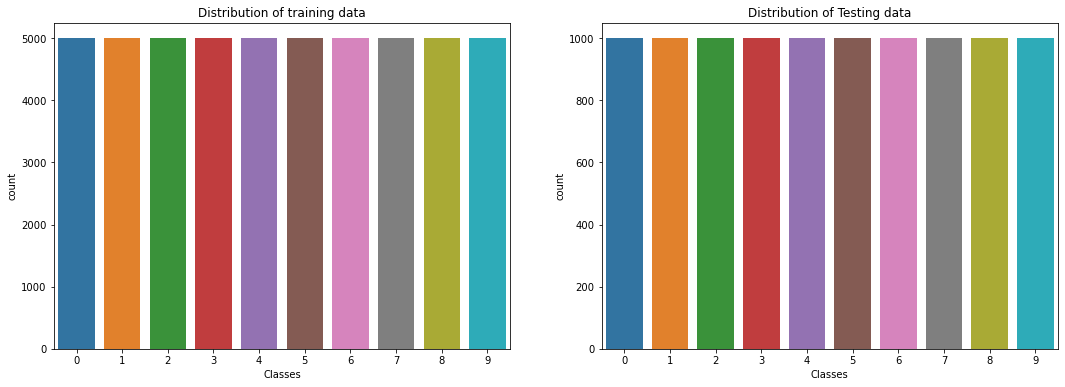

In [6]:
# Data visulization with seaborn  
# class count in train and test data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


figure, axis = plt.subplots( 1, 2 , figsize = (18,6))
sns.countplot(y_train.ravel(),ax = axis[0])
axis[0].set_title('Distribution of training data')
axis[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axis[1])
axis[1].set_title('Distribution of Testing data')
axis[1].set_xlabel('Classes')
plt.show()

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/ 255
x_test = x_test/255

import keras

y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)



In [8]:
print('The one hot label is: ', y_train_one_hot[1])
print(y_train_one_hot.shape)

The one hot label is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(50000, 10)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

#Building model computational graph
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.8))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [10]:
# Training model
#compiling model with loss, opt, metrics
loss = 'categorical_crossentropy'
opt = tf.keras.optimizers.Adam(learning_rate=0.0009,beta_1=0.9, beta_2=0.999,epsilon=1e-07)
metrics = ['accuracy']

model.compile(loss = loss, optimizer = opt, metrics = metrics)

In [12]:
# fitting the model for training dataset
hist = model.fit(x_train, y_train_one_hot, batch_size = 64 , epochs = 30, validation_split = 0.2)

Epoch 1/30
625/625 [==============================] - 222s 356ms/step - loss: 1.7719 - accuracy: 0.3462 - val_loss: 1.4817 - val_accuracy: 0.4617
Epoch 2/30
625/625 [==============================] - 248s 398ms/step - loss: 1.3828 - accuracy: 0.5015 - val_loss: 1.1308 - val_accuracy: 0.6017
Epoch 3/30
625/625 [==============================] - 135s 216ms/step - loss: 1.2077 - accuracy: 0.5666 - val_loss: 0.9937 - val_accuracy: 0.6438
Epoch 4/30
625/625 [==============================] - 120s 193ms/step - loss: 1.1081 - accuracy: 0.6078 - val_loss: 0.9507 - val_accuracy: 0.6611
Epoch 5/30
625/625 [==============================] - 129s 206ms/step - loss: 1.0334 - accuracy: 0.6355 - val_loss: 0.9166 - val_accuracy: 0.6742
Epoch 6/30
625/625 [==============================] - 118s 188ms/step - loss: 0.9844 - accuracy: 0.6533 - val_loss: 0.8656 - val_accuracy: 0.6936
Epoch 7/30
625/625 [==============================] - 119s 191ms/step - loss: 0.9307 - accuracy: 0.6747 - val_loss: 0.8141 -

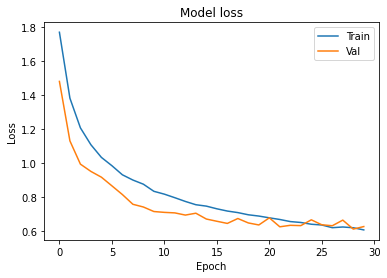

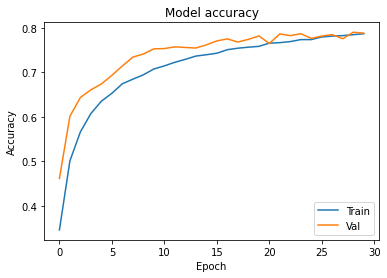

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [15]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 6s 20ms/step - loss: 0.6560 - accuracy: 0.7788


0.7788000106811523

In [19]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test_one_hot)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
313/313 [==============================] - 6s 19ms/step - loss: 0.6560 - accuracy: 0.7788
Test Accuracy: 77.88000106811523
